In [7]:
using LinearAlgebra, Statistics, Roots, Optim, Plots, Random, Distributions

number = 1000
observations =[]
for i in 1:number
    x = rand(Uniform(0,1))
    y = 2 + 1.2* x .+ rand(Normal(0,0.5))
    push!(observations,(x,y))
end


In [8]:
function kdeCV(λ,i,observations)
    x,y = observations[i]
    newobservations = copy(observations)
    deleteat!(newobservations,i)
    kde(λ,x,y,newobservations)
end
xs = 0:1/2^3:20
ys = 0:1/2^3:10
D(u) = abs(u) < 1 ? 70/81*(1-abs(u)^3)^3 : 0 
D(λ,u) = 1/λ*D(u/λ) 
K(λ,x,y) = D(λ,x) * D(λ,y) 
kde(λ,x,y,observations) = sum(K(λ,x-Xi,y-Yi) for (Xi,Yi) in observations)/length(observations)


J(λ) = sum([kde(λ,x,y,observations)^2 for x=xs,y=ys])*step(xs)*step(ys) -
        2/length(observations)*sum(kdeCV(λ,i,observations) for i=1:length(observations))
λ_best_cv = optimize(λ->J(first(λ)),[1.0],BFGS())


 * Status: success

 * Candidate solution
    Final objective value:     -5.403233e-01

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 8.87e-05 ≰ 0.0e+00
    |x - x'|/|x'|          = 3.40e-04 ≰ 0.0e+00
    |f(x) - f(x')|         = 1.65e-08 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 3.04e-08 ≰ 0.0e+00
    |g(x)|                 = 1.03e-09 ≤ 1.0e-08

 * Work counters
    Seconds run:   69  (vs limit Inf)
    Iterations:    5
    f(x) calls:    15
    ∇f(x) calls:   15


In [43]:
function plotn(n)
    number = n
    observations =[]
    for i in 1:number
        x = rand(Uniform(0,1))
        y = 2 + 1.2* x .+ rand(Normal(0,0.5))
        push!(observations,(x,y))
    end
    function kdeCV(λ,i,observations)
        x,y = observations[i]
        newobservations = copy(observations)
        deleteat!(newobservations,i)
        kde(λ,x,y,newobservations)
    end
    xs = 0:1/2^3:20
    ys = 0:1/2^3:10
    D(u) = abs(u) < 1 ? 70/81*(1-abs(u)^3)^3 : 0 
    D(λ,u) = 1/λ*D(u/λ) 
    K(λ,x,y) = D(λ,x) * D(λ,y) 
    kde(λ,x,y,observations) = sum(K(λ,x-Xi,y-Yi) for (Xi,Yi) in observations)/length(observations)


    J(λ) = sum([kde(λ,x,y,observations)^2 for x=xs,y=ys])*step(xs)*step(ys) -
        2/length(observations)*sum(kdeCV(λ,i,observations) for i=1:length(observations))
    λ_best_cv = optimize(λ->J(first(λ)),[1.0],BFGS())
    return first(λ_best_cv.minimizer)
end

out = []
for i in 10:100
    push!(out, (i,plotn(i)))
end
out

91-element Vector{Any}:
 (10, 1.1861831860005372)
 (11, 0.9676946436723393)
 (12, 0.42212035531860065)
 (13, 0.8801618400046954)
 (14, 0.7078665668824483)
 (15, 0.7599147512529524)
 (16, 0.6243397723774176)
 (17, 0.5137300308928808)
 (18, 0.5725668119225286)
 (19, 0.7737872109553412)
 (20, 0.5223429464916846)
 (21, 0.7334515911474435)
 (22, 0.6754351722623294)
 ⋮
 (89, 0.8075291402070645)
 (90, 0.4655137640575336)
 (91, 0.42878763969534706)
 (92, -0.2683706572946296)
 (93, 0.3202718404005367)
 (94, 0.4764238980473903)
 (95, -0.32535243296528116)
 (96, -0.6305853898010944)
 (97, -0.26008884134215005)
 (98, -0.40018022862191477)
 (99, -0.504684928778109)
 (100, 0.3738876756768991)

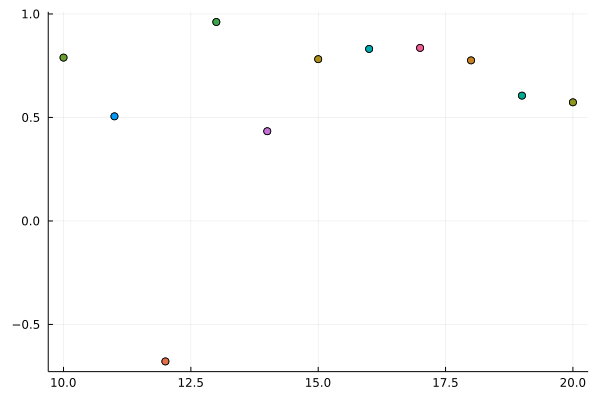

In [42]:
for i in out
    scatter!(i)
end

scatter!(legend = false)

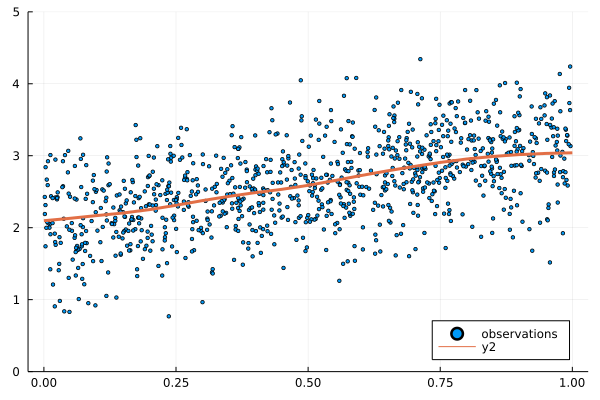

In [9]:
λ = first(λ_best_cv.minimizer)
r̂(x) = sum(D(λ,x-Xi)*Yi for (Xi,Yi) in observations)/sum(D(λ,x-Xi) for (Xi,Yi) in observations)
scatter([x for (x,y) in observations],
        [y for (x,y) in observations],label="observations",
        markersize=2, legend = :bottomright)
plot!(0:0.05:1, r̂, ylims = (0,5), linewidth = 3)

In [36]:
using SymPy
xs = 0:0.0001:1

@vars x
r(x) = 2 +1.2*x 
r̂(x) = sum(D(λ,x-Xi)*Yi for (Xi,Yi) in observations)/sum(D(λ,x-Xi) for (Xi,Yi) in observations)
sum((r̂(x)-r(x))^2 for x in xs)*step(xs)

0.0020684746610538265

In [ ]:
result = []

D(u) = abs(u) < 1 ? 70/81*(1-abs(u)^3)^3 : 0 # tri-cube function
D(λ,u) = 1/λ*D(u/λ) # scaled tri-cube
K(λ,x,y) = D(λ,x) * D(λ,y) # kernel
kde(λ,x,y,observations) = sum(K(λ,x-Xi,y-Yi) for (Xi,Yi) in observations)/length(observations)

# x values and y values for a grid
xs = 0:1/2^3:20
ys = 0:1/2^3:10

"Evaluate the summation Σᵢ f⁽⁻ⁱ⁾(Xᵢ,Yᵢ) in J(λ)'s second term"
function kdeCV(λ,i,observations)
    x,y = observations[i]
    newobservations = copy(observations)
    deleteat!(newobservations,i)
    kde(λ,x,y,newobservations)
end

J(λ) = sum([kde(λ,x,y,observation)^2 for x=xs,y=ys])*step(xs)*step(ys) -
        2/length(observation)*sum(kdeCV(λ,i,observation) for i=1:length(observation))

k=0
while k < 10
    n = rand(50.0:100.0)
    observation = []
   for i in 1:n
        x = rand(Uniform(0,1),1)
        ϵ = rand(Normal(0,0.5),1)
        y = 2 +1.2*x[1] + ϵ[1]
        push!(observation, (x[1],y)) 
    end
    λ_best_cv = optimize(λ->J(first(λ)),[1.0],BFGS())
    push!(result, (n,first(λ_best_cv.minimizer)))
    k += 1
end


In [17]:
sum([kde(λ,x,y,observations)^2 for x=xs,y=ys])

LoadError: UndefVarError: λ not defined

In [11]:
step(xs)

LoadError: MethodError: no method matching step(::Vector{Float64})
[0mClosest candidates are:
[0m  step([91m::StepRange[39m) at range.jl:543
[0m  step([91m::AbstractUnitRange{T}[39m) where T at range.jl:544
[0m  step([91m::LinRange[39m) at range.jl:547
[0m  ...